In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load data

In [80]:
df = pd.read_csv(r"RUS_combined_data.csv")
df.head()

,Unnamed: 0,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount
0,0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000
1,1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000
2,2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000
3,3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000
4,4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354392 entries, 0 to 2354391
Data columns (total 8 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Unnamed: 0               int64 
 1   id                       int64 
 2   car_brand                object
 3   car_model                object
 4   violation_date           object
 5   crossroad_name           object
 6   violation_protocol_name  object
 7   violation_ammount        int64 
dtypes: int64(3), object(5)
memory usage: 143.7+ MB


In [4]:
df.isnull().sum()

Unnamed: 0                  0
id                          0
car_brand                  23
car_model                  23
violation_date              0
crossroad_name              0
violation_protocol_name     0
violation_ammount           0
dtype: int64

### Data Cleaning

In [45]:
df = df.dropna()
df.shape

(2354369, 8)

In [46]:
df[['raw_date', 'raw_time']] = (
    df['violation_date']
    .astype(str)
    .str.split(' ', n=1, expand=True)
)

In [47]:
df.head()

,Unnamed: 0,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time
0,0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000,1/1/2020,0:03
1,1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000,1/1/2020,0:06
2,2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000,1/1/2020,0:20
3,3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:15
4,4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:17


In [48]:
df['raw_time'].isnull().sum()

134567

In [49]:
df.dropna(subset=['raw_time'], inplace=True)

In [50]:
df['normalized_time'] = pd.to_datetime(df['raw_time'], errors='coerce').dt.time

C:\Users\User\AppData\Local\Temp\ipykernel_9756\3757502716.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['normalized_time'] = pd.to_datetime(df['raw_time'], errors='coerce').dt.time


In [55]:
df.head()

,Unnamed: 0,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time,normalized_time,date_str,day,month,year
0,0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000,1/1/2020,0:03,00:03:00,1/1/2020 0:03,1,1,2020
1,1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000,1/1/2020,0:06,00:06:00,1/1/2020 0:06,1,1,2020
2,2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000,1/1/2020,0:20,00:20:00,1/1/2020 0:20,1,1,2020
3,3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:15,00:15:00,1/1/2020 0:15,1,1,2020
4,4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:17,00:17:00,1/1/2020 0:17,1,1,2020


In [53]:
df['date_str'] = df['violation_date'].astype(str).str.strip()
df['date_str'] = (
    df['date_str']
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
)


In [54]:
df['day'] = df['date_str'].str.extract(r'(\d{1,2})[./-]')
df['month'] = df['date_str'].str.extract(r'[./-](\d{1,2})[./-]')
df['year'] = df['date_str'].str.extract(r'(\d{4})')
df[['day','month','year']] = df[['day','month','year']].apply(pd.to_numeric, errors='coerce')

In [56]:
df.isnull().sum()

Unnamed: 0                 0
id                         0
car_brand                  0
car_model                  0
violation_date             0
crossroad_name             0
violation_protocol_name    0
violation_ammount          0
raw_date                   0
raw_time                   0
normalized_time            0
date_str                   0
day                        0
month                      0
year                       0
dtype: int64

In [62]:
df.duplicated().sum()

130521

In [63]:
df.drop_duplicates(inplace=True)

### EDA

In [59]:
df.head()

,Unnamed: 0,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time,normalized_time,date_str,day,month,year
0,0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000,1/1/2020,0:03,00:03:00,1/1/2020 0:03,1,1,2020
1,1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000,1/1/2020,0:06,00:06:00,1/1/2020 0:06,1,1,2020
2,2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000,1/1/2020,0:20,00:20:00,1/1/2020 0:20,1,1,2020
3,3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:15,00:15:00,1/1/2020 0:15,1,1,2020
4,4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:17,00:17:00,1/1/2020 0:17,1,1,2020


<Axes: xlabel='year'>

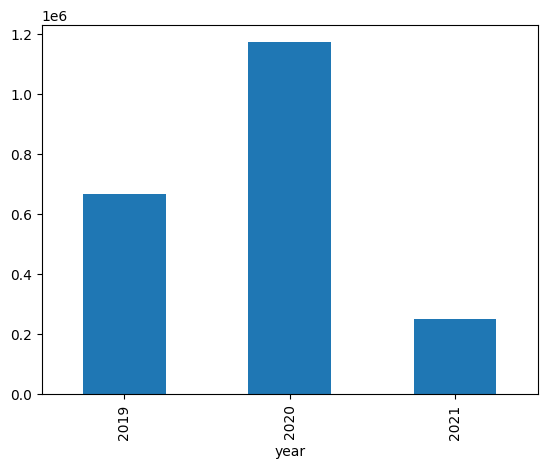

In [66]:
df['year'].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='month'>

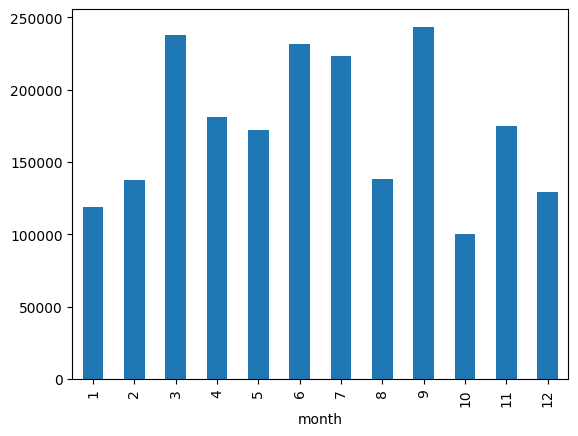

In [67]:
df['month'].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='hour'>

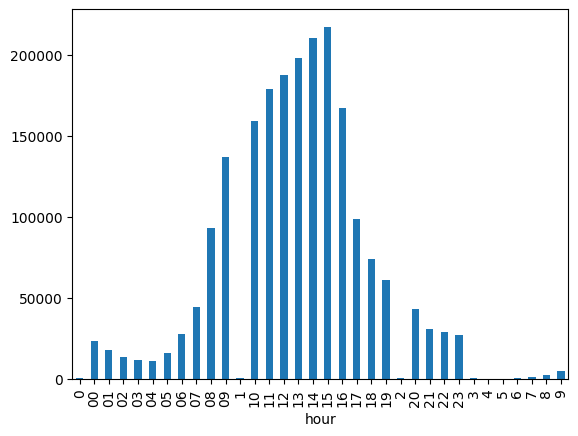

In [69]:
df['hour'] = df['date_str'].str.extract(r'(\d{1,2}):')
df['hour'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='violation_protocol_name'>

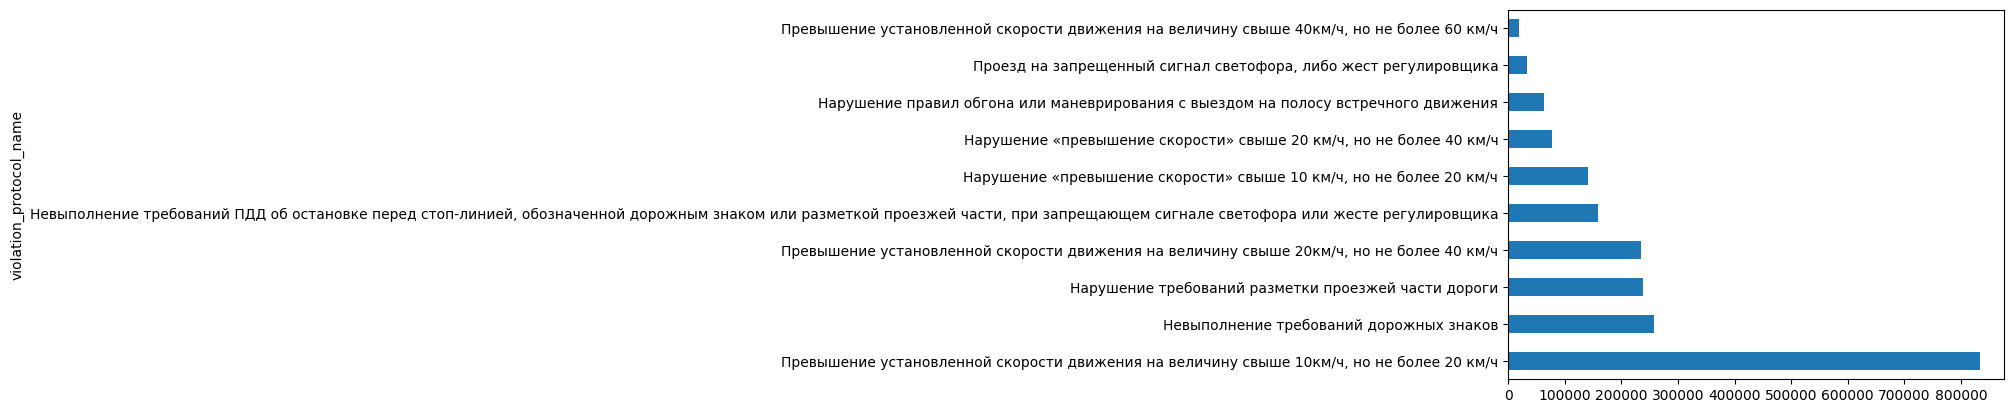

In [70]:
df['violation_protocol_name'].value_counts().head(10).plot(kind='barh')


<Axes: ylabel='crossroad_name'>

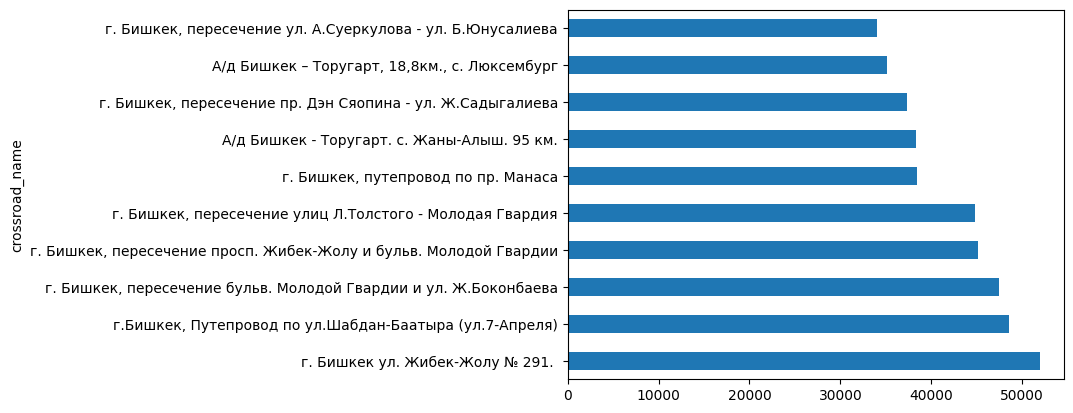

In [71]:
df['crossroad_name'].value_counts().head(10).plot(kind='barh')


<Axes: ylabel='car_brand'>

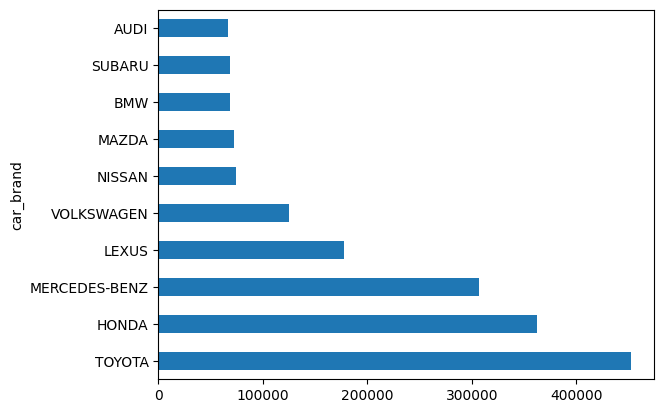

In [72]:
df['car_brand'].value_counts().head(10).plot(kind='barh')

<Axes: ylabel='Frequency'>

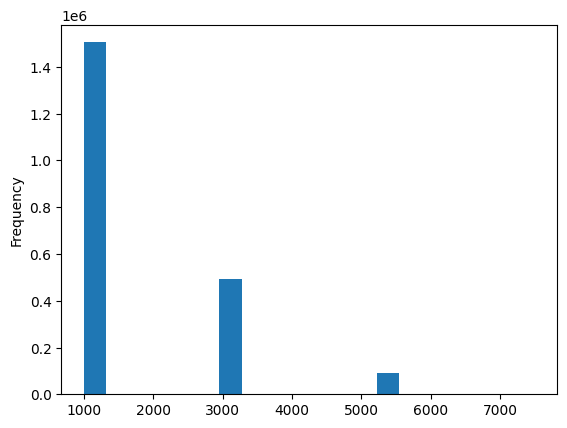

In [73]:
df['violation_ammount'].plot(kind='hist', bins=20)

In [ ]:
df[['day','month','year','violation_ammount']].corr()

,day,month,year,violation_ammount
day,1.000000,-0.056070,-0.066377,0.042670
month,-0.056070,1.000000,-0.410753,-0.032808
year,-0.066377,-0.410753,1.000000,-0.162771
violation_ammount,0.042670,-0.032808,-0.162771,1.000000


<Axes: >

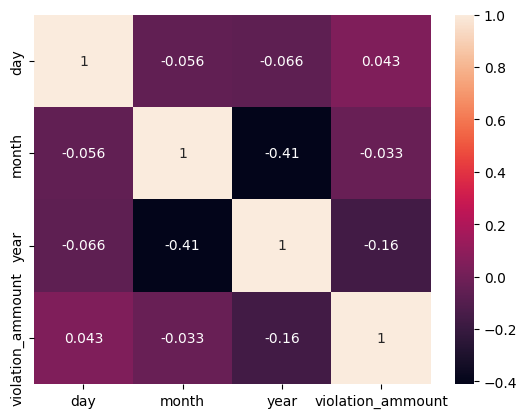

In [79]:
sns.heatmap(df[['day','month','year','violation_ammount']].corr(), annot=True)


### Data Preprocessing 